<a href="https://colab.research.google.com/github/Astra42/NumPy-con-Matplotlib-edu/blob/main/2edu_NumPy_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4 Свойства и представления массивов, создание их копий 

In [41]:
import numpy as np

In [3]:
a = np.array([0.1, 0.2, 0.3, 0.4])
a.dtype

dtype('float64')

In [4]:
a.dtype = 'int8'#или np.int8 

In [5]:
a

array([-102, -103, -103, -103, -103, -103,  -71,   63, -102, -103, -103,
       -103, -103, -103,  -55,   63,   51,   51,   51,   51,   51,   51,
        -45,   63, -102, -103, -103, -103, -103, -103,  -39,   63],
      dtype=int8)

In [6]:
a.size

32

каждый элемент, занимавший 8 байт стал представляться 1 байтом

и в итоге количество чисел увеличилось в 8 раз

In [7]:
a.dtype = np.float32
a.size

8

In [8]:
a.itemsize#сколько байт на один элемень в памяти

4

In [9]:
#размер всего массива в байт
a.size*a.itemsize

32

In [13]:
a = np.ones((3,4,5))
a.ndim #количество осей

3

In [14]:
a.shape#количество элементов на каждой оси

(3, 4, 5)

In [15]:
a.shape = 3, 20 

In [16]:
a

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

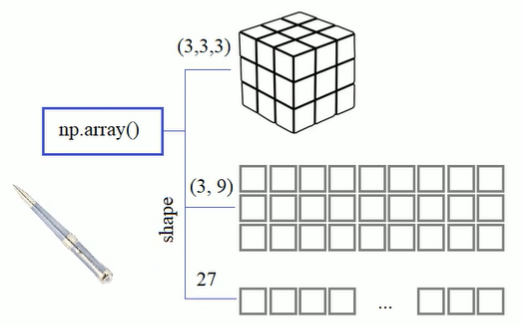

В NumPy разделяются понятия **данные** и **представления**

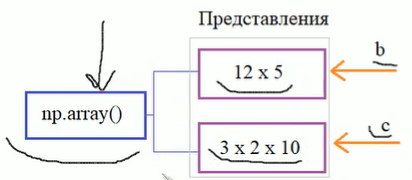

In [18]:
a = np.ones((2, 4))
b = a.reshape(1, 8)

a[0,0]=99
a

array([[99.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [19]:
b

array([[99.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [20]:
id(b), id(a)

(139825466448944, 139825466222032)

reshape - не единственный случай создания нового представления

In [23]:
t = a.T
t

array([[99.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

любое изменение формы, как правило, ведёт к созданию *представления*

метод view() - возвращает копию
 представления


In [24]:
a = np.array([1,2,3,4,5,6,7,8])
b = a


In [26]:
a.shape = 2, 4
b

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

решение здесь будет - создание копии представления

In [27]:
a = np.array([1,2,3,4,5,6,7,8])
b = a.view()

In [30]:
a.shape = (2,4)#защита от случайных изменений
b

array([1, 2, 3, 4, 5, 6, 7, 8])

А если нужно сделать копию данных?

In [31]:
a = np.array([1,2,3,4,5,6,7,8])
b = np.array(a)#создание копии или b = a.copy()

In [32]:
b[0]=99
a

array([1, 2, 3, 4, 5, 6, 7, 8])

## 5 Изменение формы массивов, добавление и удаление осей

In [5]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
a.shape = (2, 5)#первый вариант - изменить явно
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [9]:
b = a.reshape(10)# в b будет лежать новое представление одних и тех же данных
a, b

(array([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [10]:
a.shape = 3,4

ValueError: ignored

Можем использовать отрицательные размерности

`-1` - там будет столько элементов, сколько останется

In [11]:
a.shape = -1, 2
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [12]:
b.reshape(-1,1)
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

для преобразования матрицы в вектор - метод `ravel`


In [13]:
a.ravel()#матрица вытягивается в одну строку

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

или вытянуть через shape

In [15]:
a.shape = -1
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

метод resize - изменяет представление текущего массива

In [17]:
a.resize(2,5)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [19]:
a.resize(3,3, refcheck=False)#позволяет менять форму и уменьшать/увеличивать число элементов
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [21]:
a.resize(4,5, refcheck=False)
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

Транспонирование матриц

In [36]:
o = np.tril([1,2,3,4])
o

array([[1, 0, 0, 0],
       [1, 2, 0, 0],
       [1, 2, 3, 0],
       [1, 2, 3, 4]])

In [37]:
o.T


array([[1, 1, 1, 1],
       [0, 2, 2, 2],
       [0, 0, 3, 3],
       [0, 0, 0, 4]])

In [38]:
x = np.arange(9)
x.T
#ничего не изменилось, тк одна строка

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [42]:
#чтобы можно было транспонировать - нужно добавить ещё одну ось
x.shape = 1, -1
x.T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

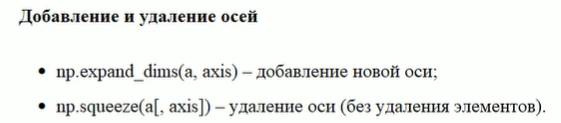

In [3]:
x = np.arange(32).reshape(8, 2, 2)

как добавить новую ось, напр, axis0

In [4]:
newx = np.expand_dims(x, axis=0)
newx.shape

(1, 8, 2, 2)

добавление элемента по индексу

In [5]:
a = np.append(newx, newx, axis=0)#добовляем такой же элемент к первой оси
a.shape


(2, 8, 2, 2)

удаление элемента по индексу

In [6]:
b = np.delete(a, 0, axis=0)
b.shape

(1, 8, 2, 2)

In [9]:
b = np.expand_dims(a, axis=-1)#-1 - добавление оси в конец
b.shape

(2, 8, 2, 2, 1)

Удаление осей в которых 1 элемент


In [12]:
c = np.squeeze(b)
c.shape

(2, 8, 2, 2)

Удалить строго определённую ось 

```
np.squeeze(b, axis = 0)
```



Добавление новых осей через объект newaxis

In [16]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [17]:
b = a[np.newaxis, :]
b.shape

(1, 12)

In [18]:
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

In [21]:
c = a[:, np.newaxis]
c, c.shape

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11]]), (12, 1))

In [23]:
c = a[np.newaxis, :, np.newaxis, np.newaxis]
c.shape, c

((1, 12, 1, 1), array([[[[ 0]],
 
         [[ 1]],
 
         [[ 2]],
 
         [[ 3]],
 
         [[ 4]],
 
         [[ 5]],
 
         [[ 6]],
 
         [[ 7]],
 
         [[ 8]],
 
         [[ 9]],
 
         [[10]],
 
         [[11]]]]))

##6 Объединение и разделение массивов

In [24]:
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])

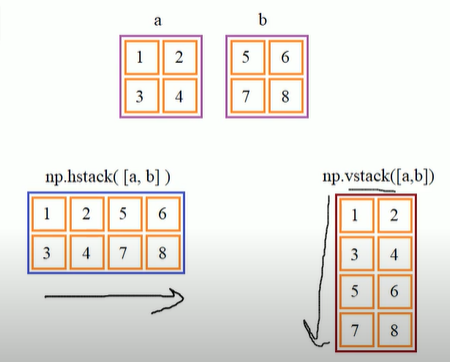

In [25]:
np.hstack([a,b])#axis 1

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [27]:
np.vstack([a,b, a])#axis 0

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [1, 2],
       [3, 4]])

In [32]:
a = np.fromstring('1_2_3_4', sep='_', dtype='int8')
b = np.fromstring('5*6*7*8', sep='*', dtype='int8')
a,b

(array([1, 2, 3, 4], dtype=int8), array([5, 6, 7, 8], dtype=int8))

In [33]:
np.hstack([a,b])

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int8)

In [35]:
np.column_stack([a,b])#представление в виде ряда колонок

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]], dtype=int8)

In [37]:
np.row_stack([a,b])#представление в виде ряда строк

array([[1, 2, 3, 4],
       [5, 6, 7, 8]], dtype=int8)

а как делать объединение по осям >1

In [47]:
a = np.arange(12)
b = np.arange(12, 24)
b.shape

(12,)

In [48]:
a.resize(3,2,2)
b.resize(3,2,2)

In [49]:
c = np.concatenate([a,b], axis=2)
c.shape

(3, 2, 4)

объединение вложенных массивов по axis0

In [50]:
np.r_[[1,2,3], 4, 5]

array([1, 2, 3, 4, 5])

In [52]:
np.r_[1:9, 10, 4, 5]

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10,  4,  5])

In [54]:
np.r_[[[1,2],[2,3]], [[4,5]]] 

array([[1, 2],
       [2, 3],
       [4, 5]])

In [58]:
np.c_[1:5]

array([[1],
       [2],
       [3],
       [4]])

In [59]:
np.c_[[1,2,3], [4, 5, 6]]


array([[1, 4],
       [2, 5],
       [3, 6]])

In [60]:
np.c_[[[1,2],[2,3]], [[4],[5]]] 

array([[1, 2, 4],
       [2, 3, 5]])

Разделение массивов

по горизонтали - hsplit

In [61]:
a = np.arange(10)
# разделение по горизонтали
np.hsplit(a, 2)
#np.hsplit(a, 3) - будет ошибка, тк нацело 10 элементов по 3 не поделить

[array([0, 1, 2, 3, 4]), array([5, 6, 7, 8, 9])]

In [62]:
np.hsplit(a, 5)

[array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]

по вертикали - vsplit

In [63]:
a.shape = 10, -1
a

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [65]:
np.vsplit(a, 2)

[array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[5],
        [6],
        [7],
        [8],
        [9]])]

Эти функции можно использовать с многомерными массивами

In [66]:
a = np.arange(12)
a.resize(2, 6)

In [67]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [69]:
np.hsplit(a, 2)

[array([[0, 1, 2],
        [6, 7, 8]]), array([[ 3,  4,  5],
        [ 9, 10, 11]])]

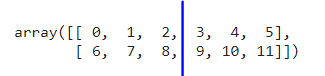

Разбивка для произвольной оси

In [70]:
a = np.arange(18)
a.shape = 3, 3, 2
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]]])

In [71]:
np.array_split(a, 2, axis=2)

[array([[[ 0],
         [ 2],
         [ 4]],
 
        [[ 6],
         [ 8],
         [10]],
 
        [[12],
         [14],
         [16]]]), array([[[ 1],
         [ 3],
         [ 5]],
 
        [[ 7],
         [ 9],
         [11]],
 
        [[13],
         [15],
         [17]]])]

In [72]:
np.array_split(a, 2, axis=0)

[array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],
 
        [[ 6,  7],
         [ 8,  9],
         [10, 11]]]), array([[[12, 13],
         [14, 15],
         [16, 17]]])]